# Amazon Top Selling Book 2009 - 2019
Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

This data was taken from [kaggle](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019) user

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
books = pd.read_csv('../data_files/amazon_best_seller/bestsellers with categories.csv')

In [4]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
# books.drop('Year', axis=1, inplace=True)

In [7]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
books.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

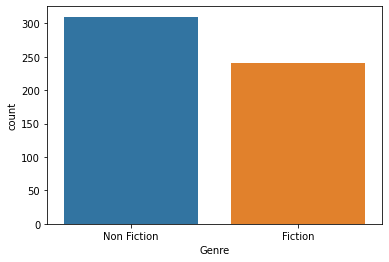

In [9]:
sns.countplot(x='Genre', data=books)

<AxesSubplot:xlabel='User Rating', ylabel='Price'>

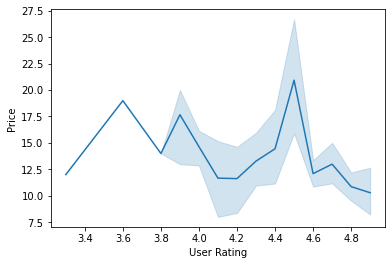

In [10]:
sns.lineplot(x='User Rating', y='Price', data=books)

In [11]:
print(books.groupby('Genre').mean())

             User Rating       Reviews      Price         Year
Genre                                                         
Fiction         4.648333  15683.791667  10.850000  2013.925000
Non Fiction     4.595161   9065.145161  14.841935  2014.058065


In [14]:
books = books.drop_duplicates(keep='first')

In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 34.4+ KB


In [16]:
books.shape

(550, 7)

In [17]:
books['Author'].sort_values().unique()

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [18]:
#get the top 10 authors
books.groupby('Author')[['User Rating']].mean().sort_values('User Rating', ascending=False).head(10)

,User Rating
Author,
Jill Twiss,4.9
Nathan W. Pyle,4.9
Chip Gaines,4.9
Rush Limbaugh,4.9
Bill Martin Jr.,4.9
Emily Winfield Martin,4.9
Pete Souza,4.9
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9


In [19]:
# the most sold book in 2009-2019
books.groupby(['Name', 'Author'])['Author'].agg(['count']).sort_values(by='count', ascending=False).head(10)

,,count
Name,Author,
"Publication Manual of the American Psychological Association, 6th Edition",American Psychological Association,10
StrengthsFinder 2.0,Gallup,9
"Oh, the Places You'll Go!",Dr. Seuss,8
The Very Hungry Caterpillar,Eric Carle,7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,Stephen R. Covey,7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),Don Miguel Ruiz,6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),Sarah Young,6
The Official SAT Study Guide,The College Board,5
To Kill a Mockingbird,Harper Lee,5
